### 4-1. 인구현황 데이터 분석

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

data = pd.read_csv('data/인구현황.csv')
print(data.shape)
print(type(data))

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

matplotlib.rc('font', family=font_name)

(18, 8)
<class 'pandas.core.frame.DataFrame'>
Malgun Gothic


In [51]:
# 1. 지역별 총인구수 Top5
re_df = data.loc[data['행정기관'] != '전국', ['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).reset_index(drop=True)
re_df.head(5)

,행정기관,총인구수
0,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
3,경상남도,3228380
4,인천광역시,3021010


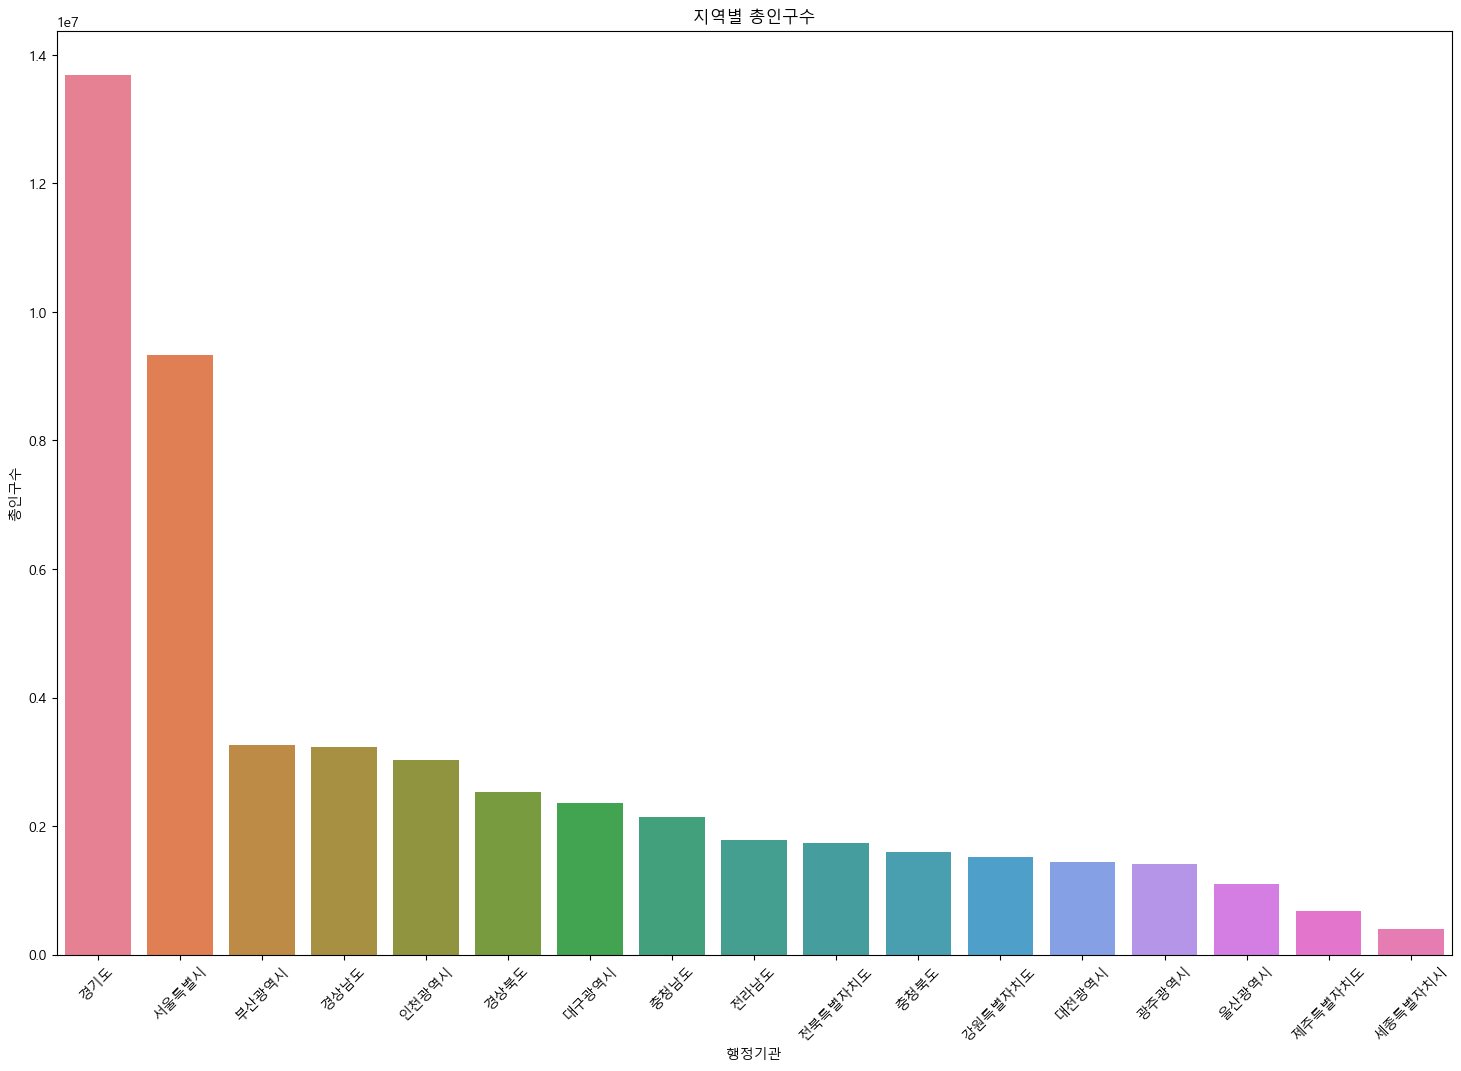

In [52]:
# 1-1. 지역별 총인구수 plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

pop_plot = sns.barplot(data=re_df.sort_values(by='총인구수',ascending=False),x='행정기관',y='총인구수',ax=axes1,hue='행정기관')
pop_plot.set_title(f'지역별 총인구수')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [54]:
# 2. 세대당 인구수 높은 지역 Top5
no_df = data.loc[data['행정기관'] != '전국', ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)
no_df.head(5)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


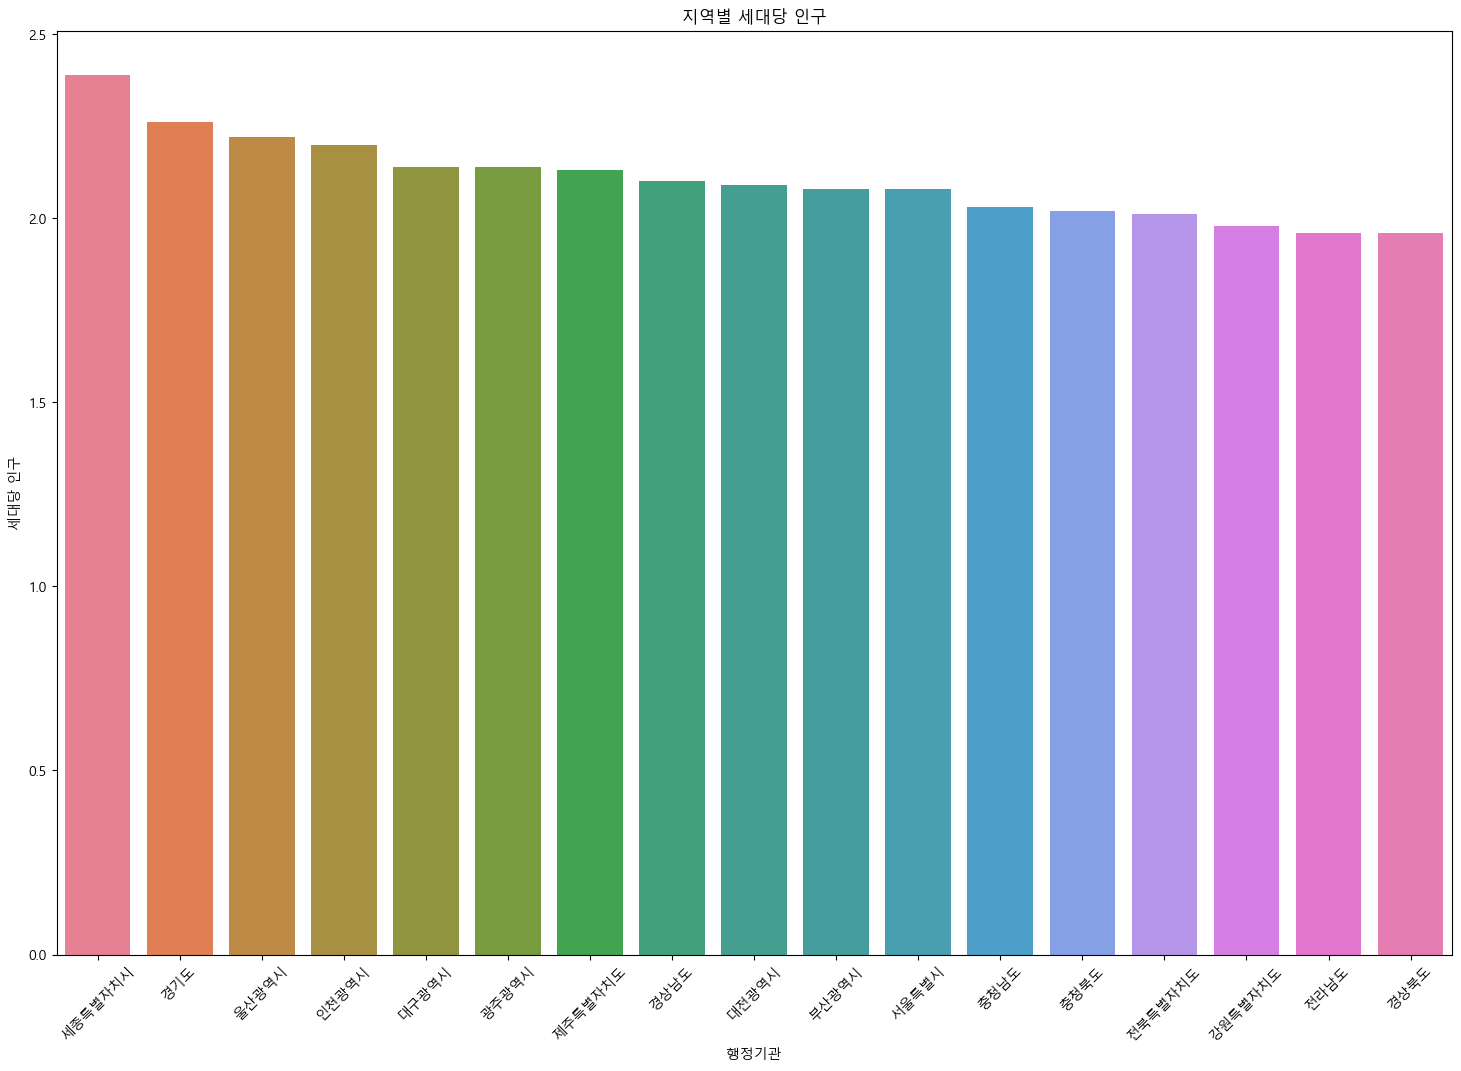

In [55]:

# 2-1. 지역별 세대당 인구 Plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

pop_plot = sns.barplot(data=no_df.sort_values(by='세대당 인구',ascending=False),x='행정기관',y='세대당 인구',ax=axes1,hue='행정기관')
pop_plot.set_title(f'지역별 세대당 인구')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [ ]:
# 3. 남녀 비율 분석
ge_df = data.loc[data['행정기관'] != '전국', ['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)
ge_df

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


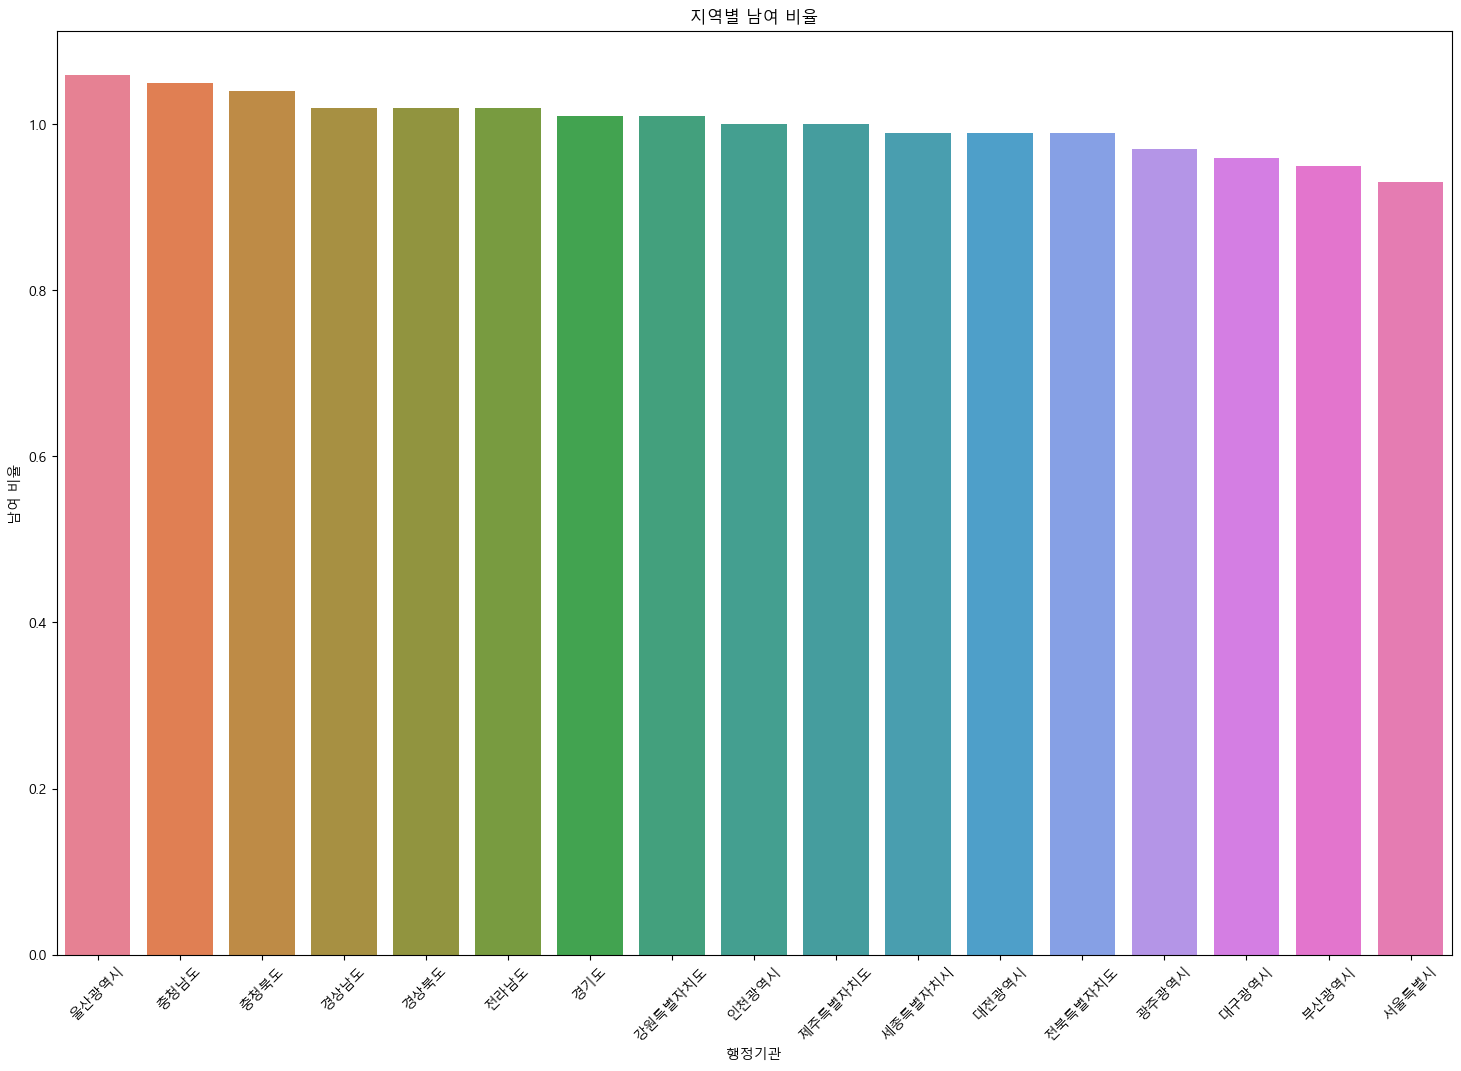

In [ ]:
# 3-1. 남녀 비율 분석 Plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

pop_plot = sns.barplot(data=ge_df.sort_values(by='남여 비율',ascending=False),x='행정기관',y='남여 비율',ax=axes1,hue='행정기관')
pop_plot.set_title(f'지역별 남여 비율')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [ ]:
# 4. 남자초과 / 여자초과 분석


In [ ]:
# 5. 세대당 인구 평균보다 높은 지역

In [ ]:
# 5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot 지역별 세대수 Plot ( seaborn의 barplot )
